In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import jax.numpy as jnp
import jax
import jax.random as jr
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp
import wat
from eins import EinsOp
import treescope


is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [2]:
%cd ~/cdv

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from pathlib import Path
import pyrallis
from cdv.config import MainConfig
import orbax.checkpoint as ocp

from cdv.training_state import TrainingRun
from cdv.checkpointing import best_ckpt


# run_dir = Path('logs') / '08-31-22-23_488'
run_dir = Path('logs') / '09-04-00-23_500'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

if config.task == 'e_form':
    model = config.build_regressor()
elif config.task == 'vae':
    model = config.build_vae()


ckpt = best_ckpt(run_dir)
# ckpt = jax.tree.map(lambda x: x if isinstance(x, (float, int)) else x.astype(jnp.float32), ckpt)
model = model.bind(ckpt['state']['params'])

Configured `CheckpointManager` using deprecated legacy API. Please follow the instructions at                      
https://orbax.readthedocs.io/en/latest/api_refactor.html to migrate by May 1st, 2024.

Given directory is read only=/home/nmiklaucic/cdv/logs/09-04-00-23_500/final_ckpt/ckpts

Restoring item from /home/nmiklaucic/cdv/logs/09-04-00-23_500/final_ckpt/ckpts/21491.

Finished restoring checkpoint from /home/nmiklaucic/cdv/logs/09-04-00-23_500/final_ckpt/ckpts/21491.

In [4]:
import treescope as tz

In [5]:
from cdv.utils import debug_structure, debug_stat
params = ckpt['state']['params']['params']
tz.show(params)

TreescopeFigure(
    treescope_part=PreventWordWrap(
        child=Siblings(
            children=(
                WithDynamicSharedPip(
                    child=FoldableTreeNodeImpl(
                        contents=Siblings(
                            children=(
                                IndentedChildren(
                                    children=[
                                        Siblings(
                                            children=(
                                                StringLiteralColor(
                                                    child=Text(text="'edge_embedding'")
                                                ),
                                                Text(text=': '),
                                                WithDynamicSharedPip(
                                                    child=FoldableTreeNodeImpl(
                                                        contents=Siblings(
                                                            children=(
                                                                StringCopyButton(
                                                                    copy_string="['edge_embedding']",
                                                                    annotation='Copy path: '
                                                                ),
                                                                IndentedChildren(
                                                                    children=[
                                                                        Siblings(
                                                                            children=(
                                                                                StringLiteralColor(
                                                                                    child=Text(
                                                                                        text="'basis'"
                                                                                    )
                                                                                ),
                                                                                Text(text=': '),
                                                                                WithDynamicSharedPip(
                                                                                    child=FoldableTreeNodeImpl(
                                                                                        contents=Siblings(
                                                                                            children=(
                                                                                                StringCopyButton(
                                                                                                    copy_string="['edge_embedding']['basis']",
                                                                                                    annotation='Copy path: '
                                                                                                ),
                                                                                                IndentedChildren(
                                                                                                    children=[
                                                                                                        Siblings(
                                                                                                            children=(
                                                                                                                StringLiteralColor(
                                                                                                                    child=Text(
                                                                                                    

In [6]:
mace = params
spec_emb = mace['node_embedding']['embed']['embedding'].astype(jnp.float32)

spec_df = pd.DataFrame(spec_emb, index=config.data.metadata['elements'])
spec_df.head()

0         1         2         3         4         5         6   \
Cs -0.081660 -0.249974  0.092564  0.133038  0.180505  0.050955 -0.369785   
K  -0.112210 -0.016032  0.026113 -0.045945  0.563927 -0.059045 -0.359243   
Rb -0.130914  0.031166  0.040013 -0.033393  0.475833 -0.053097 -0.357382   
Ba  0.251141  0.141060 -0.233931 -0.508051  0.139582  0.002375 -0.380801   
Na -0.103469  0.522912  0.085085  0.008239  0.143689 -0.344064 -0.361597   

          7         8         9   ...        54        55        56        57  \
Cs  0.468763  0.205262  0.058449  ...  0.214753  0.243404 -0.186083  0.213463   
K   0.244851 -0.011093  0.056137  ...  0.016069  0.305472 -0.015594 -0.272098   
Rb  0.426939  0.166372 -0.014234  ...  0.072095  0.345121 -0.138050 -0.205323   
Ba  0.162717 -0.290548 -0.244661  ... -0.254496  0.531029 -0.039816 -0.131633   
Na  0.313053  0.016485  0.062896  ...  0.102833  0.424867  0.406386 -0.400976   

          58        59        60        61        62        63  
Cs  0.514388 -0.082215 -0.311986  0.003904  0.304589 -0.506091  
K   0.182284  0.412273  0.141284 -0.154716  0.036873 -0.133665  
Rb  0.339841  0.056718 -0.127779 -0.126026 -0.005478 -0.374631  
Ba  0.355774 -0.084429  0.117848  0.239666  0.013072 -0.212990  
Na -0.009043  0.281088 -0.167065  0.032563 -0.056959  0.132234  

[5 rows x 64 columns]

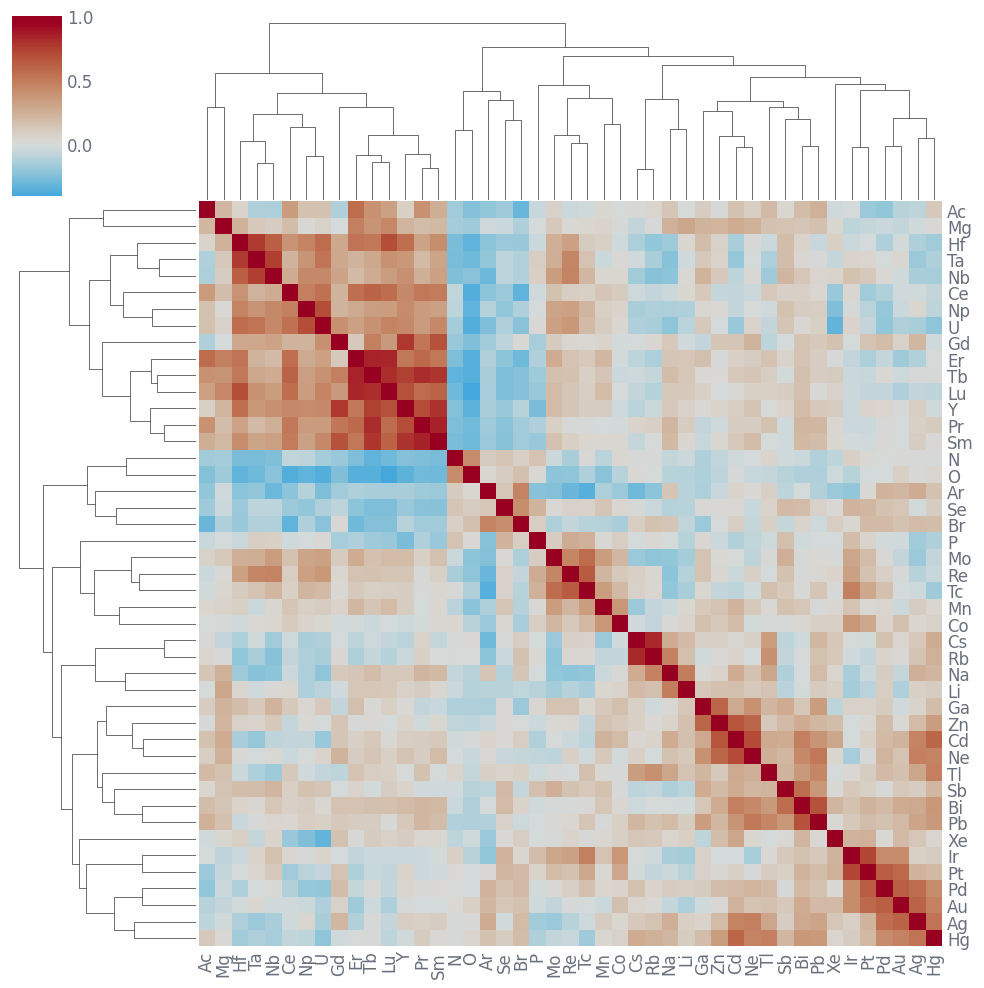

In [7]:
sns.clustermap(spec_df.T.corr().iloc[::2, ::2], xticklabels=1, yticklabels=1, cmap='rho_diverging', center=0)

In [8]:
from umap import UMAP
import plotly.express as px

umap = UMAP(n_neighbors=20, metric='euclidean')

spec_df[['x', 'y']] = umap.fit_transform(spec_df.drop(columns=['x', 'y'], errors='ignore').values)

spec_df.columns = [str(c) for c in spec_df.columns]
px.scatter(spec_df.reset_index(), x='x', y='y', text='index', width=800, height=800, opacity=0)

2024-09-04 16:30:36.883166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 16:30:36.898343: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 16:30:36.902956: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 16:30:37.639770: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VE

In [9]:
debug_structure(params['mace']['layer_2']);

arg0
├── interaction
│   ├── SevenNetConv_0 >>> LazyInMLP_0 >>> Dense_0 >>> kernel
│   │   └── (np)f32[12, 616]
│   ├── linear_intro
│   │   ├── w[0,0] 86x0e,86x0e
│   │   │   └── (np)f32[86, 86]
│   │   ├── w[1,1] 28x1e,28x1e
│   │   │   └── (np)f32[28, 28]
│   │   └── w[2,2] 18x2e,18x2e
│   │       └── (np)f32[18, 18]
│   └── linear_outro
│       ├── w[0,0] 132x0e,86x0e
│       │   └── (np)f32[132, 86]
│       ├── w[1,1] 224x1e,28x1e
│       │   └── (np)f32[224, 28]
│       └── w[2,2] 260x2e,18x2e
│           └── (np)f32[260, 18]
├── resid_ln >>> ln_scale
│   └── (np)f32[132]
└── self_connection
    ├── mlp
    │   ├── Dense_0 >>> kernel
    │   │   └── (np)f32[14, 32]
    │   ├── Dense_1 >>> kernel
    │   │   └── (np)f32[32, 14]
    │   └── LayerNorm_0 >>> scale
    │       └── (np)f32[32]
    ├── proj_down
    │   ├── w[0,0] 28x0e,86x0e
    │   │   └── (np)f32[28, 86]
    │   ├── w[1,1] 28x1e,28x1e
    │   │   └── (np)f32[28, 28]
    │   └── w[2,2] 28x2e,18x2e
    │       └── (np)f32[28, 18]
    └── proj_up
        ├── w[0,0] 86x0e,28x0e
        │   └── (np)f32[86, 28]
        ├── w[1,1] 28x1e,28x1e
        │   └── (np)f32[28, 28]
        └── w[2,2] 18x2e,28x2e
            └── (np)f32[18, 28]

<Axes: >

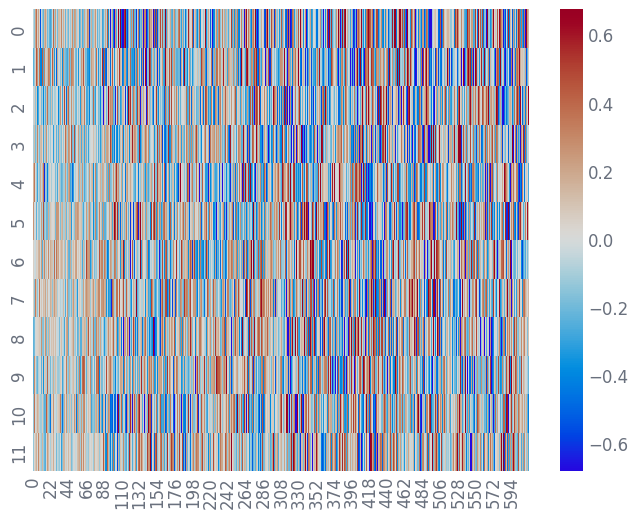

In [10]:
sns.heatmap(params['mace']['layer_2']['interaction']['SevenNetConv_0']['LazyInMLP_0']['Dense_0']['kernel'], center=0, cmap='rho_diverging', robust=True)

In [11]:
params['edge_embedding']


{
    'basis': {
        'freq': array([ 0.7451192,  1.8681908,  2.729881 ,  3.8309927,  4.80187  ,
        5.8081837,  6.814543 ,  7.796445 ,  8.80136  ,  9.853915 ,
       11.085586 , 12.448959 ], dtype=float32)
    },
    'rmax': array([6.9608455], dtype=float32)
}

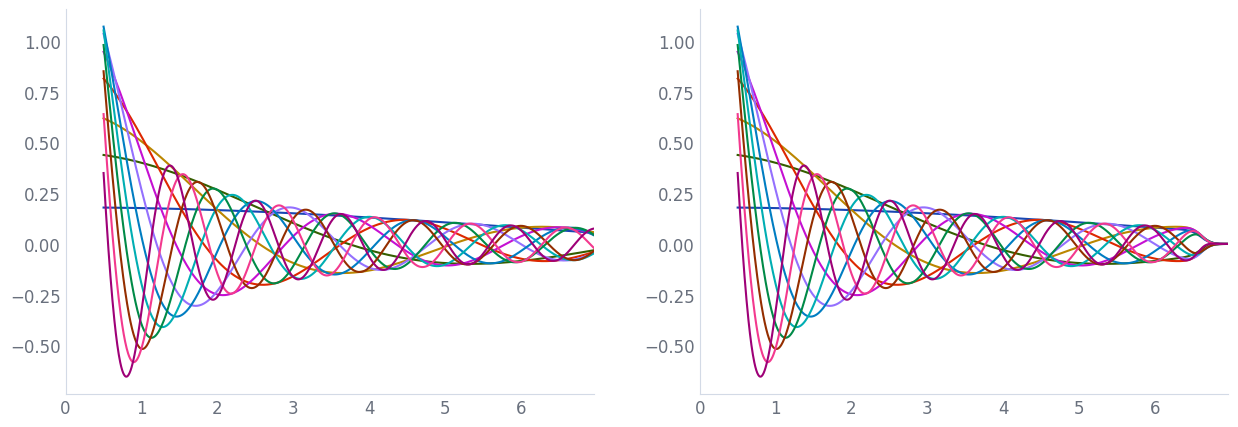

TreescopeFigure(
    treescope_part=PreventWordWrap(
        child=Siblings(
            children=(
                WithDynamicSharedPip(
                    child=FoldableTreeNodeImpl(
                        contents=Siblings(
                            children=(
                                IndentedChildren(
                                    children=[
                                        Siblings(
                                            children=(
                                                StringLiteralColor(child=Text(text="'basis'")),
                                                Text(text=': '),
                                                WithDynamicSharedPip(
                                                    child=FoldableTreeNodeImpl(
                                                        contents=Siblings(
                                                            children=(
                                                                StringCopyButton(
                                                                    copy_string="['basis']",
                                                                    annotation='Copy path: '
                                                                ),
                                                                IndentedChildren(
                                                                    children=[
                                                                        Siblings(
                                                                            children=(
                                                                                StringLiteralColor(
                                                                                    child=Text(
                                                                                        text="'freq'"
                                                                                    )
                                                                                ),
                                                                                Text(text=': '),
                                                                                WithDynamicSharedPip(
                                                                                    child=FoldableTreeNodeImpl(
                                                                                        contents=FoldCondition(
                                                                                            collapsed=EmptyPart(),
                                                                                            expanded=IndentedChildren(
                                                                                                children=[
                                                                                                    Siblings(
                                                                                                        children=(
                                                                                                            Text(
                                                                                                                text='array([ 0.7451192,  1.8681908,  2.729881 ,  3.8309927,  4.80187  ,\n        5.8081837,  6.814543 ,  7'+80
                                                                                                            ),
                                                                                                        )
                                                                                                    )
                                                                                                ]
                                                                                            )
                                                                                        ),
            

In [12]:
from cdv.layers import Context


radial_embed = model.edge_embedding.basis
rmax = model.edge_embedding.param_rmax.item()

rr = jnp.linspace(0.5, rmax * 1, 1000)
ee = radial_embed(rr, r_max=rmax, ctx=Context(training=False))
ee2 = model.edge_embedding(rr, ctx=Context(training=False)).array
# for x in params['mace']['edge_embedding']['basis']['freq']:
#     plt.axvline(jnp.pi * x / radial_embed.r_max, lw=0.5, c='grey')
dip = rr[jnp.argmin(jnp.abs(jnp.diff(ee, axis=-1)), axis=0)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
ax1.plot(rr, ee)
ax2.plot(rr, ee2)

ff = model.edge_embedding.basis.freq


# ax1.axvline(1 * jnp.pi / rmax * ff[4])
# for f in ff[7:]:
#     dip = (jnp.pi / 2) * rmax / f
#     if dip < rmax:
#         ax1.axvline(dip, lw=0.5, color='grey')

plt.xlim(0, rmax * 1)
plt.show()

tz.show(params['edge_embedding'])

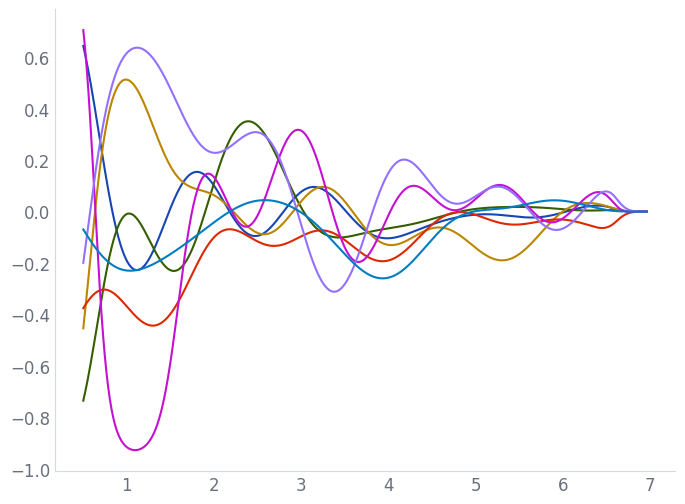

In [13]:
from cdv.layers import shifted_softplus
from flax import linen as nn

from cdv.utils import intercept_stat

layer_i = 1

mlp_mod_params = params['mace'][f'layer_{layer_i}']['interaction']['SevenNetConv_0']['LazyInMLP_0']

mlp_mod = model.mace.layers[layer_i].interaction.conv.radial_weight.copy(out_dim=mlp_mod_params['Dense_0']['kernel'].shape[-1], inner_act=shifted_softplus)

# with nn.intercept_methods(intercept_stat):
ww = mlp_mod.apply({'params': mlp_mod_params}, x=ee2, ctx=Context(training=False))

plt.plot(rr, ww[..., ::101]);
# plt.yscale('symlog')

<Axes: >

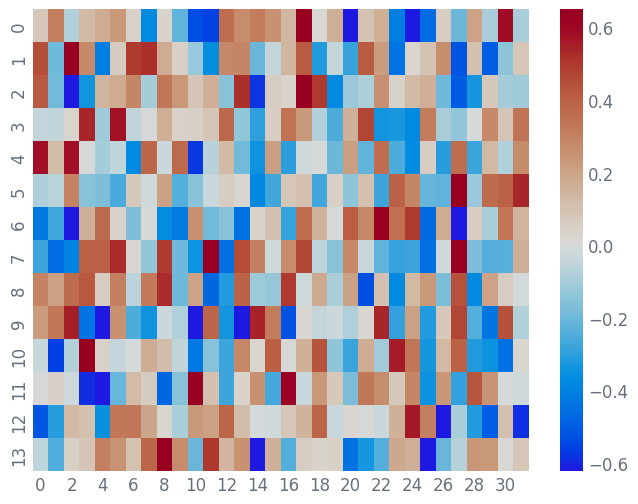

In [47]:
s2_sc = model.mace.layers[-2].self_connection
s2_sc_params = params['mace']['layer_2']['self_connection']

sns.heatmap(s2_sc_params['mlp']['Dense_0']['kernel'], center=0, cmap='rho_diverging', robust=True)

In [48]:
s2_sc


S2SelfConnection(
    # attributes
    irreps_out = (86x0e, 28x1e, 18x2e)
    act = S2Activation(
        # attributes
        activation = silu
        res_beta = 20
        res_alpha = 19
        normalization = 'integral'
        quadrature = 'soft'
        fft = False
    )
    mlp = LazyInMLP(
        # attributes
        inner_dims = (32,)
        out_dim = None
        residual = False
        inner_act = silu
        final_act = Identity()
        dropout_rate = 0.0
        kernel_init = init
        bias_init = init
        normalization = 'layer'
        use_bias = False
        # children
        final_act = Identity()
        Dense_0 = Dense(
            # attributes
            features = 32
            use_bias = False
            dtype = dtype('float32')
            param_dtype = float32
            precision = None
            kernel_init = init
            bias_init = init
            dot_general = None
            dot_general_cls = None
        )
        Dropout_0 = 

In [51]:
import e3nn_jax as e3nn
from cdv.layers import Context
x = e3nn.normal('86x0e + 28x1e + 18x2e')
y = s2_sc.apply({'params': s2_sc_params}, x, node_specie=None, species_embed=None, ctx=Context(training=False))

y

/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/e3nn_jax/_src/basic.py:610: UserWarning:

e3nn.normal: the key (random seed) is not provided, use the hash of the irreps as key!




IrrepsArray(
    irreps=86x0e+28x1e+18x2e,
    array=Array([ 2.8068852e-01, -6.9435239e-01, -4.6431080e-01,  7.2755605e-01,
       -3.3813733e-01,  1.0079942e+00, -5.6808716e-01,  5.7744656e-02,
        5.8767084e-02, -7.0241612e-01, -2.7583867e-01,  1.0609056e-01,
        1.8298452e-01, -4.0005338e-01, -1.2336948e+00,  1.0200529e+00,
       -2.4539779e-01, -6.7625147e-01,  5.1424277e-01, -8.4032720e-01,
        3.9636064e-01,  9.0341371e-01, -3.2462943e-01,  5.4781133e-01,
       -9.5701404e-02,  4.2656505e-01, -7.6030068e-02, -3.6607008e-02,
        6.3067144e-01, -3.1451592e-01, -8.0009356e-02, -1.4246619e+00,
        7.8434873e-01, -1.1263863e+00,  3.5699546e-01, -2.5155622e-01,
       -1.2661619e+00,  6.8362391e-01, -6.6076642e-01,  8.8883293e-01,
       -9.7609061e-01,  2.8968530e-03, -3.8515037e-01, -1.2121626e+00,
        8.4624326e-01, -2.6285121e-01, -6.1545116e-01,  7.9017144e-01,
       -1.1460896e+00,  4.2102450e-01, -1.3940080e+00, -6.4280444e-01,
       -6.7988485e-01, 

In [63]:
x.filter('1e').array.shape

(84,)

In [77]:
GaussBasis(64, 8.0, 0.1)(jnp.linspace(0, 10, 20), ctx=Context(training=False))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 GaussBasis(64, 8.0, 0.1)(jnp.linspace(0, 10, 20), ctx=Context(training=False))               │
│   2                                                                                              │
│                                                                                                  │
│ /home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/flax/linen/module.py:701 in   │
│ wrapped_module_method                                                                            │
│                                                                                                  │
│    698 │   # otherwise call the wrapped function as is.                                          │
│    699 │   if args and isinstance(args[0], Module):                                              │
│    700 │     self, args = args[0], args[1:]                                                      │
│ ❱  701 │     return self._call_wrapped_method(fun, args, kwargs)                                 │
│    702 │   else:                                                                                 │
│    703 │     return fun(*args, **kwargs)                                                         │
│    704                                                                                           │
│                                                                                                  │
│ /home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/flax/linen/module.py:1233 in  │
│ _call_wrapped_method                                                                             │
│                                                                                                  │
│   1230 │     # call method                                                                       │
│   1231 │     if _use_named_call:                                                                 │
│   1232 │   │   with jax.named_scope(_derive_profiling_name(self, fun)):                          │
│ ❱ 1233 │   │     y = run_fun(self, *args, **kwargs)                                              │
│   1234 │     else:                                                                               │
│   1235 │   │   y = run_fun(self, *args, **kwargs)                                                │
│   1236                                                                                           │
│                                                                                                  │
│ /home/nmiklaucic/cdv/cdv/mace/edge_embedding.py:67 in __call__                                   │
│                                                                                                  │
│    64 │   │   self.locs = jnp.linspace(0, self.mu_max, self.num_basis)                           │
│    65 │                                                                                          │
│    66 │   def __call__(self, d: Float[Array, ' *batch'], ctx: Context) -> Float[Array, '*batch   │
│ ❱  67 │   │   z = d[..., None] - self.locs                                                       │
│    68 │   │   y = jnp.exp(-(z**2) / (2 * self.sd**2))                                            │
│    69 │   │   return y                                                                           │
│    70                                                                                            │
│                                                                                                  │
│ /home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/flax/linen/module.py:1326 in  │
│ __getattr__                                                


[
    ... +54
]

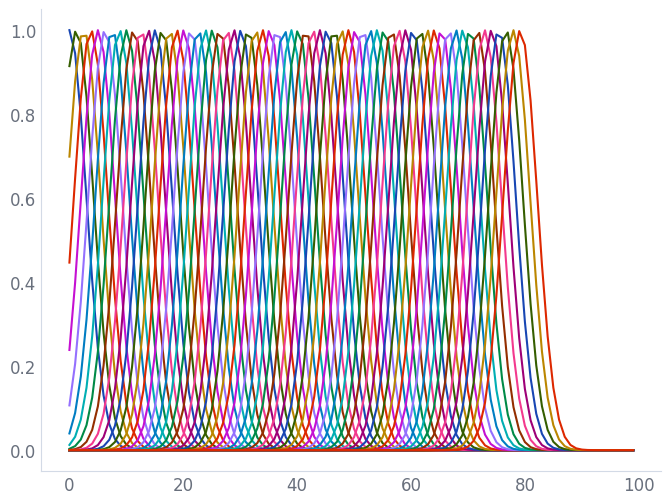

In [86]:
from cdv.mace.edge_embedding import GaussBasis

out, params = GaussBasis(64, 8.0, 0.3).init_with_output(jr.key(123), jnp.linspace(0, 10, 100), ctx=Context(training=False))

plt.plot(out)

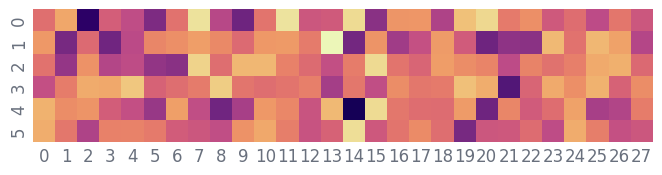

In [70]:
xy = jnp.concat([x.filter('1e').array.reshape(-1, 3), y.filter('1e').array.reshape(-1, 3)], axis=-1)
sns.heatmap(xy.T, square=True, cbar=False, cmap='rho_heatmap')

import plotly.graph_objects as go

xx, yy, zz, uu, vv, ww = xy.T

go.Figure(go.Cone(x=xx, y=yy, z=zz, u=uu, v=vv, w=ww))

In [14]:
from cdv.dataset import dataloader

num_test, test_dl = dataloader(config, split='test')

In [15]:
from cdv.layers import Context
batch = jax.tree.map(lambda x: x[0], next(iter(test_dl)))

preds = model(batch, ctx=Context(training=False))

In [16]:
import e3nn_jax as e3nn

new_batch1, rots1 = batch.rotate(29205)
new_preds1 = model(new_batch1, ctx=Context(training=False))


new_batch2, rots2 = batch.rotate(29206)
new_preds2 = model(new_batch2, ctx=Context(training=False))

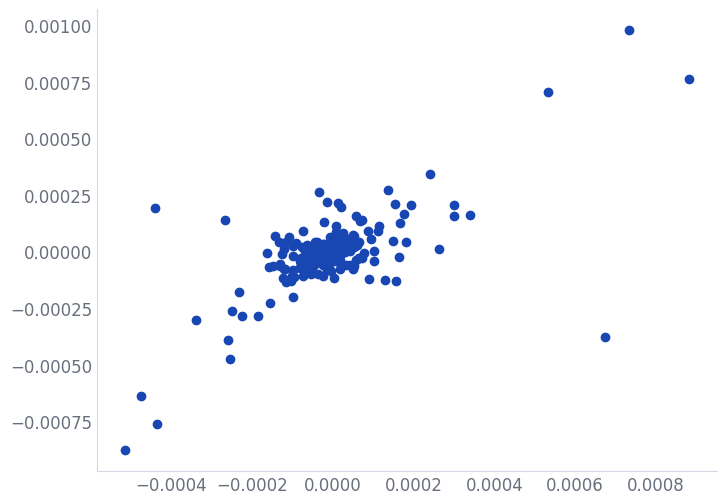

In [17]:
plt.scatter(preds - new_preds1, preds - new_preds2)

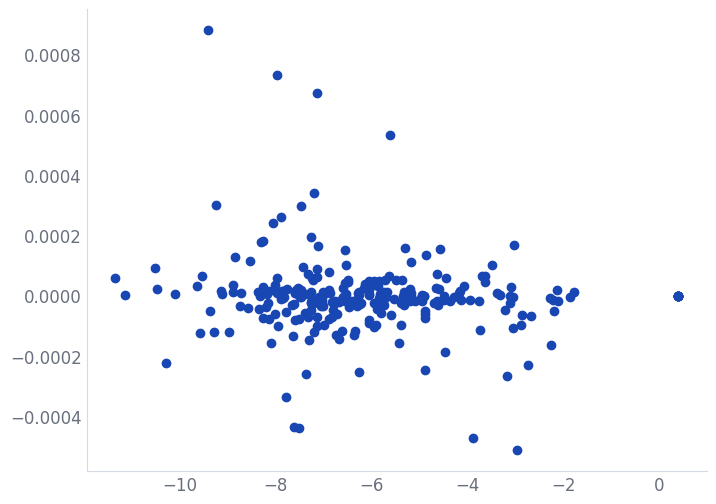

In [18]:
plt.scatter(preds, preds - new_preds1)

In [23]:
jnp.max(jnp.abs(preds - new_preds1))

Array(0.0008812, dtype=float32)

In [22]:
from collections.abc import Sequence
import plotly.express as px
import plotly.graph_objects as go
from pymatgen.core import Element
from pymatgen.core import Structure

from cdv.databatch import CrystalGraphs
# elements = config.data.metadata['elements']
jmol = pd.read_csv('https://raw.githubusercontent.com/CorySimon/JMolColors/master/jmolcolors.csv').set_index('atom')
jmol_map = {
    i: '#' + row['Hex']
    for i, row in jmol.iterrows()
}

def cg_to_struct(cg: CrystalGraphs, batch_i: int = 0):
    mask = (cg.nodes.graph_i == batch_i) & cg.padding_mask[cg.nodes.graph_i]    
    coords = np.array(cg.nodes.cart)[mask]
    species_i = np.array(cg.nodes.species)[mask]
    species = [Element.from_Z(i) for i in species_i]
    lat = cg.globals.lat[batch_i]
    return Structure(lat, species, coords, coords_are_cartesian=True)

def plot_struct(structs: Structure | Sequence[Structure], last_frame='actual', use_cartesian=False):
    if isinstance(structs, Structure):
        structs = [structs]
    
    sdfs = []
    for i, struct in enumerate(structs):
        if use_cartesian:
            sdf = pd.DataFrame(struct.cart_coords, columns=['x', 'y', 'z'])
        else:            
            sdf = pd.DataFrame(struct.frac_coords % 1, columns=['x', 'y', 'z'])
        sdf['atom'] = struct.species
        sdf['frame'] = i
        if last_frame is not None and i == len(structs) - 1:
            sdf['frame'] = last_frame
        sdfs.append(sdf)

    sdf = pd.concat(sdfs)
    if use_cartesian:
        xyz = struct.cart_coords.reshape(-1)
        ptp = np.ptp(xyz)
        range_xyz = [min(xyz) - 0.1 * ptp, max(xyz) + 0.1 * ptp]
    else:
        range_xyz = [-0.05, 1.05]
    return px.scatter_3d(sdf, x='x', y='y', z='z', color='atom', color_discrete_map=jmol_map, animation_frame='frame',
                         range_x=range_xyz, range_y=range_xyz, range_z=range_xyz)

batch_i = jnp.argmax(jnp.abs(preds - new_preds1)).item()
# plot_struct(struct)
fig = plot_struct([cg_to_struct(new_batch1, batch_i), cg_to_struct(batch, batch_i)], use_cartesian=False)
fig.update_layout(scene_aspectmode='cube')

In [25]:
from cdv.layers import Context
from tqdm import tqdm
from itertools import islice


num_test, test_dl = dataloader(config, split='test')
num_test = 100

predict = jax.jit(lambda b: model.apply(ckpt['state']['params'], cg=b, ctx=Context(training=False)))

test_preds = []
batches = []
for batch in tqdm(islice(test_dl, num_test), total=num_test):
    batches.append(jax.tree.map(lambda x: x[0], batch))
    test_preds.append(predict(batches[-1]))

aug_preds = []
aug_batches = []

aug_rng = np.random.default_rng(413)
aug_rots = []
for batch in tqdm(batches[:num_test]):
    aug_batch, aug_rot = batch.rotate(aug_rng.integers(1, 1000))    
    aug_rots.append(aug_rot)
    aug_batches.append(aug_batch)
    aug_preds.append(predict(aug_batches[-1]))

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:19<00:00,  5.18it/s]
100it [00:14,  7.14it/s]


MAE:	0.0461
RMSE:	0.1147
Equiv:	8.296e-05


Text(0, 0.5, 'Actual')

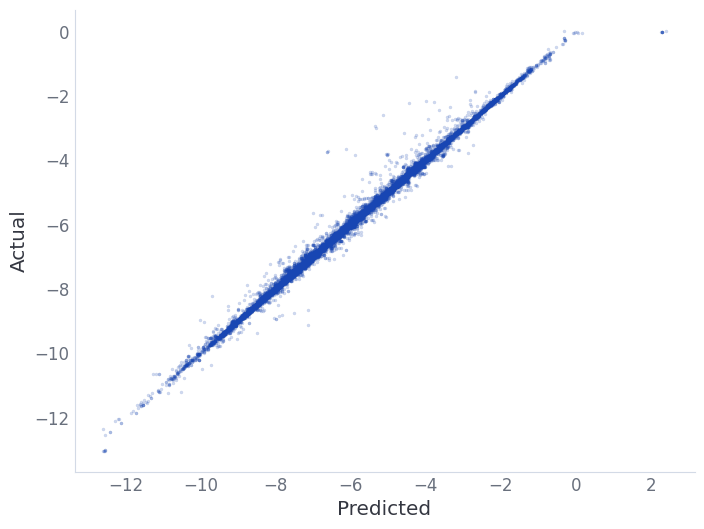

In [26]:
yhat = jnp.stack(test_preds).astype(jnp.float32).reshape(-1)
aug_yhat = jnp.stack(aug_preds).astype(jnp.float32).reshape(-1)
y = jnp.stack([batch.e_form for batch in batches]).astype(jnp.float32).reshape(-1)

mask = jnp.stack([batch.padding_mask for batch in batches]).reshape(-1)

y, yhat = y[mask], yhat[mask]
aug_yhat = aug_yhat[mask]
print('MAE:\t{:.4f}'.format(jnp.mean(jnp.abs(yhat - y))))
print('RMSE:\t{:.4f}'.format(jnp.sqrt(jnp.mean(jnp.square(yhat - y)))))
print('Equiv:\t{:.4g}'.format(jnp.mean(jnp.abs(aug_yhat - yhat))))
sns.scatterplot(x=yhat, y=y, ec=None, alpha=0.2, s=5)
plt.xlabel('Predicted')
plt.ylabel('Actual')

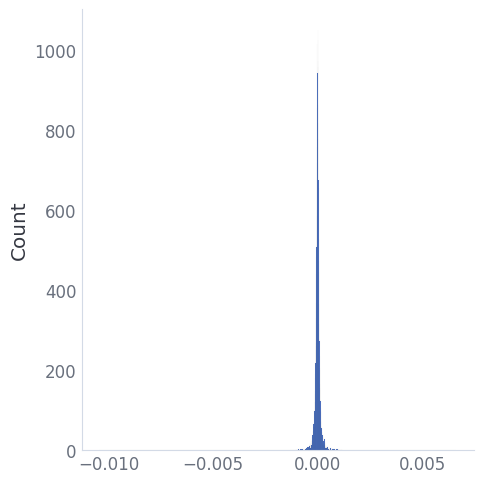

In [27]:
sns.displot(aug_yhat - yhat)

In [ ]:
sns.boxplot(x=y, hue=jnp.abs(aug_yhat - yhat) > 0.0005)

In [ ]:
sns.boxplot(x=jnp.clip(jnp.abs(yhat - y), 0, 0.4), hue=jnp.abs(aug_yhat - yhat) > 0.0005)

In [ ]:
from scipy.stats import spearmanr
spearmanr(jnp.abs(yhat - y), jnp.abs(aug_yhat - yhat))

In [ ]:
ii = jnp.repeat(jnp.arange(len(batches))[..., None], len(test_preds[0]), axis=-1).reshape(-1)
jj = jnp.repeat(jnp.arange(len(test_preds[0]))[None, ...], len(batches), axis=0).reshape(-1)

ii[4], jj[4]

In [ ]:
inds = jax.lax.top_k(np.abs(aug_yhat - yhat), k=50)[-1]
ind = inds[2]
i = ii[mask][ind].item()
j = jj[mask][ind].item()
print(i, j)

In [ ]:
print(batches[i].e_form[j])
print(test_preds[i][j])
print(aug_preds[i][j])

In [ ]:
dataset_ids = []
for i, j in zip(ii[mask][inds], jj[mask][inds]):
    print('{:8.3f} {:8.3f} {:8.3f}'.format(batches[i].e_form[j], test_preds[i][j].item(), aug_preds[i][j].item()))
    dataset_ids.append(batches[i].graph_data.dataset_id[j].item())

dataset_ids

In [ ]:
struct = cg_to_struct(batches[i], j)
print(struct)
# print(cg_to_struct(batches[i], j).to_file('ta.poscar', fmt='poscar'))

In [ ]:
batches[i].graph_data.dataset_id[j]

In [ ]:
df = pd.read_feather('precomputed/mptrj/summary.feather')

el_cols = []
for el in Element:
    if el.symbol in df.columns:
        el_cols.append(el.symbol)
        df[el.symbol] = df[el.symbol].fillna(0).astype(np.uint64)

In [ ]:
from pymatgen.core import Composition
bad_df = df[df['dataset_id'].isin(dataset_ids)]

comps = [Composition(row[el_cols].to_dict()) for i, row in bad_df.iterrows()]
print(', '.join(list(map(str, comps))))

In [ ]:
bad_df.iloc[0]

In [ ]:
def find(dataset_id):
    for num in range(2 ** 5):
        potential_id = str(int(np.binary_repr(num) + np.binary_repr(dataset_id, width=32), base=2))
        if potential_id[0] in '12' and potential_id[-4] in '01' and '0' in potential_id[-3:]:
            print(np.binary_repr(num), potential_id)

find(-706419692)

In [ ]:
sns.kdeplot(bad_df[['alpha', 'beta', 'gamma']].values.reshape(-1))
sns.kdeplot(df.sample(1000)[['alpha', 'beta', 'gamma']].values.reshape(-1))

In [ ]:
bins = sorted([c for c in df.columns if c.startswith('bin_')])
normed = bad_df[bins] / bad_df[bins].sum(axis=1).values.reshape(-1, 1)
ref_normed = df[bins] / df[bins].sum(axis=1).values.reshape(-1, 1)

xx = [float(x.removeprefix('bin_')) for x in normed.columns]


plt.plot(xx, normed.mean(axis=0))
plt.plot(xx, ref_normed.mean(axis=0))
plt.axvline(model.edge_embedding.param_rmax)